Firsly here, imported all necessary libraries.

In [75]:
import zipfile
import os
import numpy as np
import cv2
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
zip_path = '/content/signs.zip'  #here my dataset is in zipfile, in order to I can use that, I have to unzip that file.
extract_folder = '/content/signss' # the unzipped file will be extracted to this folder for further usage.
if not os.path.exists(extract_folder):
    print("Extracting dataset zip...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)
    print("Extraction complete!")
else:
    print("Dataset already extracted.")


Extracting dataset zip...
Extraction complete!


In [79]:
def load_data_from_folder(folder_path):
    data = []    # List to store HOG feature vectors for all images
    labels = []  # List to store corresponding class labels

    # Loop over each class folder in the dataset directory
    for class_label in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, class_label)

        # Make sure it is a directory (class folder)
        if os.path.isdir(class_folder):

            # Loop over each image file in the current class folder
            for img_file in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_file)

                # Read the image from file
                image = imread(img_path)
                if image is None:
                    print(f"Error loading image: {img_path}")
                    continue  # Skip this image if it couldn't be loaded

                # Handle grayscale images by converting them to RGB
                if image.ndim == 2:
                    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

                # Handle images with alpha channel by removing the alpha channel
                elif image.shape[2] == 4:
                    image = image[:, :, :3]

                # Resize the image to a fixed size (256x256) for consistency
                image = cv2.resize(image, (256, 256))

                # Convert the resized image to grayscale for feature extraction
                gray_image = rgb2gray(image)

                # Extract Histogram of Oriented Gradients (HOG) features from grayscale image
                features, _ = hog(
                    gray_image,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2),
                    visualize=True,
                    block_norm='L2-Hys'
                )

                # Append the extracted features and class label to lists
                data.append(features)
                labels.append(class_label)

    # Convert lists to numpy arrays for easier handling in ML models
    return np.array(data), np.array(labels)



In [67]:
train_path = os.path.join(extract_folder, 'signs/Train') # creating a train path
test_path = os.path.join(extract_folder, 'signs/Test') #creating a test path


In [80]:
print("Loading training data...")
X_train, y_train = load_data_from_folder(train_path) #trainin the model with the train dataset
print(f"Training samples: {len(y_train)}")

Loading training data...
Training samples: 252


In [69]:
print("Loading testing data...")
X_test, y_test = load_data_from_folder(test_path) #tessting the model with test dataset
print(f"Testing samples: {len(y_test)}")

Loading testing data...
Testing samples: 255


in code bellow, creating the confusion matrix for both knn and decision tree


In [81]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.show()

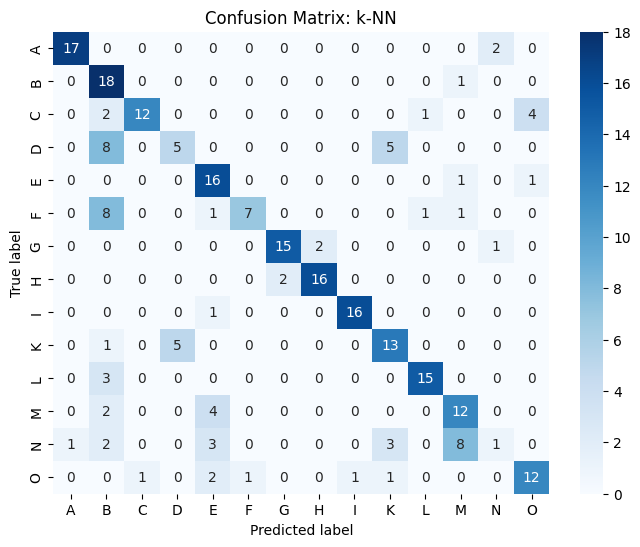

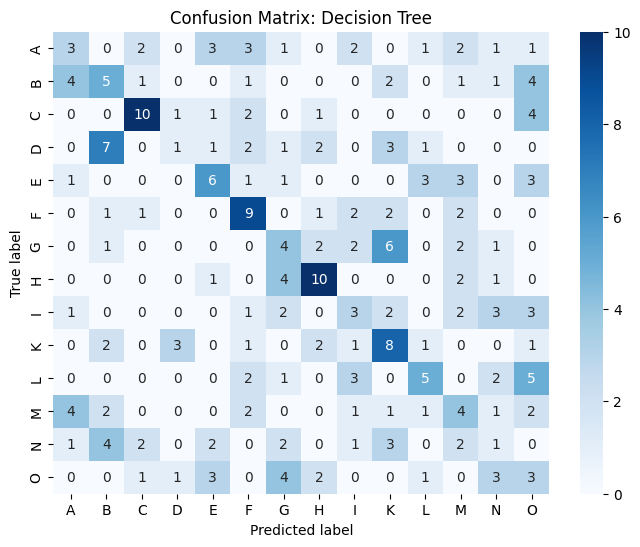

In [82]:
plot_confusion_matrix(y_test, knn_preds, classes, "Confusion Matrix: k-NN")
plot_confusion_matrix(y_test, dt_preds, classes, "Confusion Matrix: Decision Tree")


In [83]:
# Create k-NN classifier with k=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
# Train the k-NN model on the training data and labels
knn.fit(X_train, y_train)
# Use the trained model to predict labels for the test data
knn_preds = knn.predict(X_test)
# Print classification report showing precision, recall, f1-score, and support for each class
print("\n=== k-NN Classifier Report ===")
print(classification_report(y_test, knn_preds))
# Print the confusion matrix to show how many test samples were correctly or incorrectly classified
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_preds))



=== k-NN Classifier Report ===
              precision    recall  f1-score   support

           A       0.94      0.89      0.92        19
           B       0.41      0.95      0.57        19
           C       0.92      0.63      0.75        19
           D       0.50      0.28      0.36        18
           E       0.59      0.89      0.71        18
           F       0.88      0.39      0.54        18
           G       0.88      0.83      0.86        18
           H       0.89      0.89      0.89        18
           I       0.94      0.94      0.94        17
           K       0.59      0.68      0.63        19
           L       0.88      0.83      0.86        18
           M       0.52      0.67      0.59        18
           N       0.25      0.06      0.09        18
           O       0.71      0.67      0.69        18

    accuracy                           0.69       255
   macro avg       0.71      0.69      0.67       255
weighted avg       0.71      0.69      0.67     

In [84]:
# Create a Decision Tree classifier with a fixed random state for reproducibility
dt = DecisionTreeClassifier(random_state=42)
# Train the Decision Tree model on the training data and labels
dt.fit(X_train, y_train)
# Use the trained model to predict labels for the test data
dt_preds = dt.predict(X_test)
# Print classification report showing precision, recall, f1-score, and support for each class
print("\n=== Decision Tree Classifier Report ===")
print(classification_report(y_test, dt_preds))
# Print the confusion matrix to show how many test samples were correctly or incorrectly classified
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_preds))



=== Decision Tree Classifier Report ===
              precision    recall  f1-score   support

           A       0.21      0.16      0.18        19
           B       0.23      0.26      0.24        19
           C       0.59      0.53      0.56        19
           D       0.17      0.06      0.08        18
           E       0.35      0.33      0.34        18
           F       0.38      0.50      0.43        18
           G       0.20      0.22      0.21        18
           H       0.50      0.56      0.53        18
           I       0.20      0.18      0.19        17
           K       0.30      0.42      0.35        19
           L       0.38      0.28      0.32        18
           M       0.20      0.22      0.21        18
           N       0.07      0.06      0.06        18
           O       0.12      0.17      0.14        18

    accuracy                           0.28       255
   macro avg       0.28      0.28      0.27       255
weighted avg       0.28      0.28      

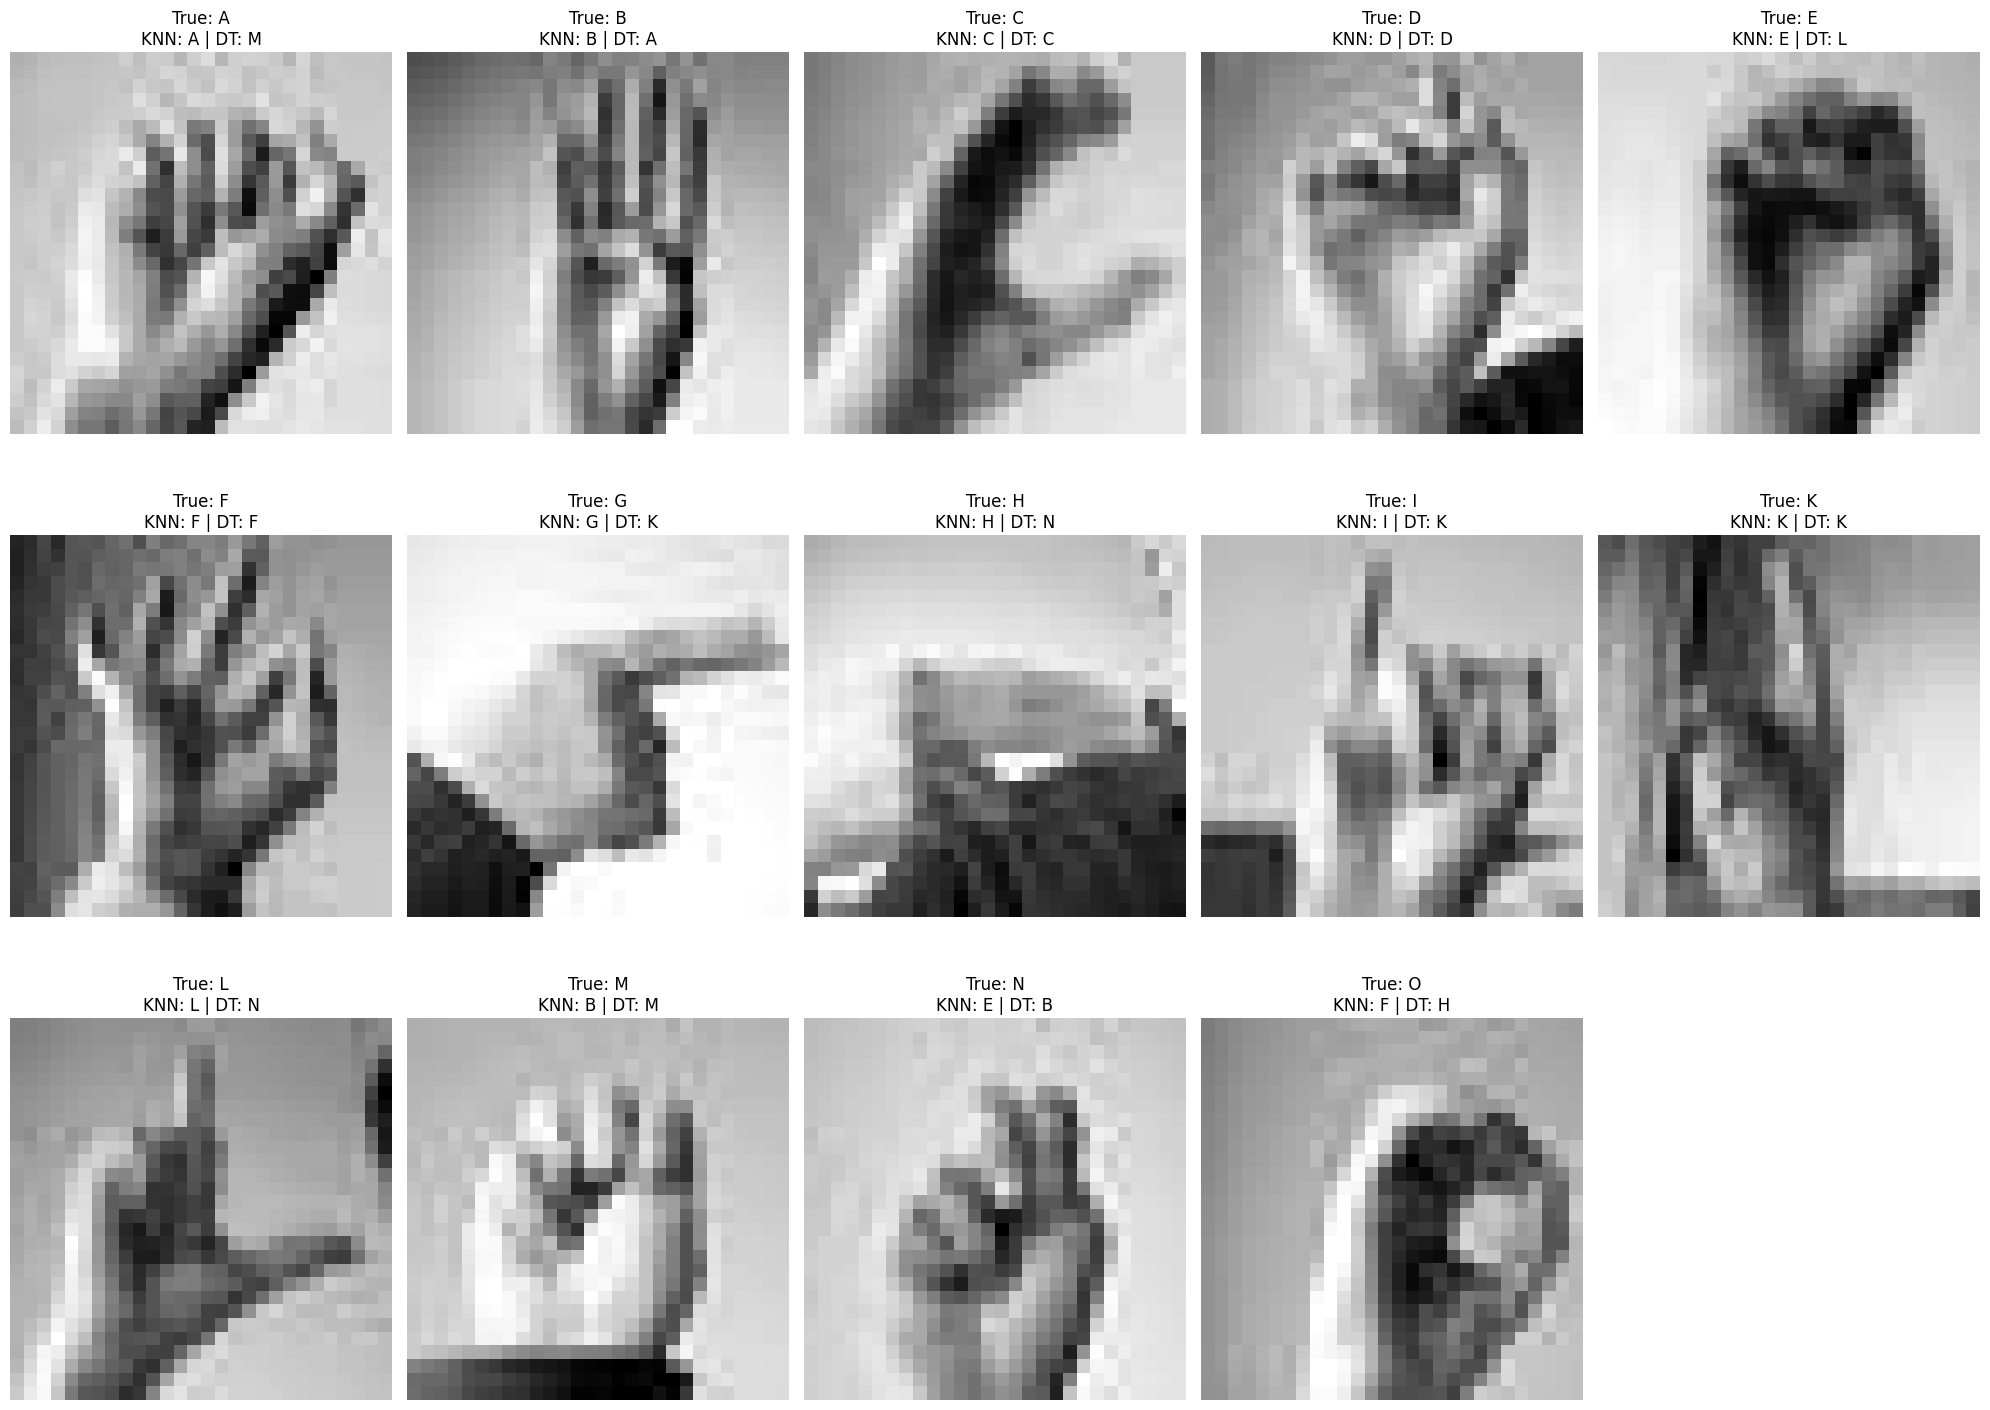

In [85]:
import matplotlib.pyplot as plt

# Get sorted list of class labels in the test set (e.g., ['A', 'B', ..., 'O'])
classes = sorted(os.listdir(test_path))

samples_to_show = []  # List to store one random sample image path and its true label per class

# For each class, randomly pick one image from the class folder
for class_label in classes:
    class_folder = os.path.join(test_path, class_label)
    img_file = np.random.choice(os.listdir(class_folder))  # Randomly select one image filename
    img_path = os.path.join(class_folder, img_file)
    samples_to_show.append((img_path, class_label))  # Append tuple of (image_path, true_label)

# Set up the matplotlib figure with enough size to display all samples nicely
plt.figure(figsize=(20, 15))

# Loop through the collected samples and display them with predictions
for i, (img_path, true_label) in enumerate(samples_to_show):
    image = imread(img_path)  # Read image

    # Convert to grayscale for display, handling grayscale or RGBA images safely
    if image.ndim == 2:
        gray_image = image
    elif image.shape[2] == 4:
        gray_image = rgb2gray(image[:, :, :3])
    else:
        gray_image = rgb2gray(image)

    # Resize image to 256x256 and convert to grayscale for feature extraction
    resized_image = cv2.resize(image, (256, 256))
    if resized_image.ndim == 2:
        gray_resized = resized_image
    elif resized_image.shape[2] == 4:
        gray_resized = rgb2gray(resized_image[:, :, :3])
    else:
        gray_resized = rgb2gray(resized_image)

    # Extract HOG features from resized grayscale image
    features, _ = hog(
        gray_resized,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=True,
        block_norm='L2-Hys'
    )
    features = features.reshape(1, -1)  # Reshape to 2D array for sklearn

    # Predict class labels using trained k-NN and Decision Tree classifiers
    knn_pred = knn.predict(features)[0]
    dt_pred = dt.predict(features)[0]

    # Plot the grayscale image without axis ticks
    plt.subplot(3, 5, i + 1)  # Arrange plots in 3 rows and 5 columns (adjust if needed)
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')

    # Show true label and predictions from k-NN and Decision Tree as title
    plt.title(f"True: {true_label}\nKNN: {knn_pred} | DT: {dt_pred}")

# Adjust layout so titles and images don’t overlap
plt.tight_layout()
plt.show()

